In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization library
import seaborn as sns; sns.set()

# Retail Data


In [3]:
df = pd.read_csv("data_raw/retail.csv")

In [4]:
df.head()

,Back to Contents,Data 1: Retail
0,Sourcekey,EMM_EPMR_PTE_NUS_DPG
1,Date,Weekly U.S. Regular All Formulations Retail Ga...
2,1990-08-20 00:00:00,1.191
3,1990-08-27 00:00:00,1.245
4,1990-09-03 00:00:00,1.242


In [5]:
df = df.iloc[1:]

In [6]:
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)
new_column_names = ['date', 'price']  # List of new header names
df.columns = new_column_names

In [7]:
df.head()

,date,price
0,1990-08-20 00:00:00,1.191
1,1990-08-27 00:00:00,1.245
2,1990-09-03 00:00:00,1.242
3,1990-09-10 00:00:00,1.252
4,1990-09-17 00:00:00,1.266


In [8]:
df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1747 non-null   datetime64[ns]
 1   price   1741 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.4 KB


In [10]:
df.isna().sum()

date     0
price    6
dtype: int64

In [11]:
# Fill NaN prices with price of previous dates
x = df[df['price'].isna()]
df['price'].fillna(method='ffill', inplace=True)

In [12]:
df.min()

date     1990-08-20 00:00:00
price                  0.907
dtype: object

In [13]:
df.max()

date     2024-02-05 00:00:00
price                  5.006
dtype: object

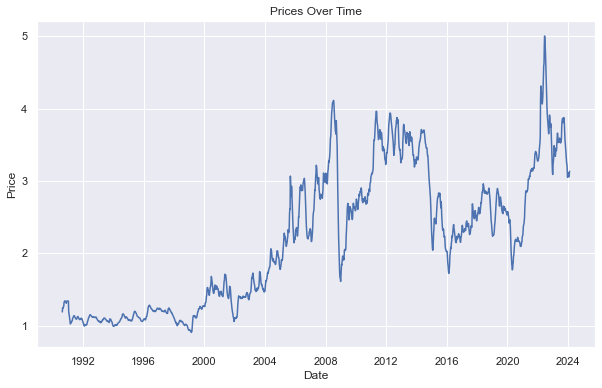

In [14]:
# Plot the prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['price'], linestyle='-')
plt.title('Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
df.to_csv("data_converted/Retail_converted.csv")

# Regions

In [152]:
df = pd.read_csv("data/regions.csv")

In [153]:
df.head()

,Back to Contents,Data 2: Regions,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Sourcekey,EMM_EPMR_PTE_R10_DPG,EMM_EPMR_PTE_R1X_DPG,EMM_EPMR_PTE_R1Y_DPG,EMM_EPMR_PTE_R1Z_DPG,EMM_EPMR_PTE_R20_DPG,EMM_EPMR_PTE_R30_DPG,EMM_EPMR_PTE_R40_DPG,EMM_EPMR_PTE_R50_DPG,EMM_EPMR_PTE_R5XCA_DPG
1,Date,Weekly East Coast Regular All Formulations Ret...,Weekly New England (PADD 1A) Regular All Formu...,Weekly Central Atlantic (PADD 1B) Regular All ...,Weekly Lower Atlantic (PADD 1C) Regular All Fo...,Weekly Midwest Regular All Formulations Retail...,Weekly Gulf Coast Regular All Formulations Ret...,Weekly Rocky Mountain Regular All Formulations...,Weekly West Coast Regular All Formulations Ret...,Weekly West Coast (PADD 5) Except California R...
2,1992-05-11 00:00:00,1.071,NaN,NaN,NaN,1.103,1.084,1.117,1.189,NaN
3,1992-05-18 00:00:00,1.085,NaN,NaN,NaN,1.118,1.095,1.169,1.208,NaN
4,1992-05-25 00:00:00,1.092,NaN,NaN,NaN,1.117,1.094,1.159,1.218,NaN


In [154]:
df = df.iloc[1:]